In [27]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [28]:
def load_data(type, file_type):
    path = f"dataset/{type}/{file_type}.csv"
    df = pd.read_csv(
        path, 
        encoding="utf-8",
        low_memory=False,
        dtype=int)
    
    df["label"] = 1 if file_type == "A1" else 0
    return df

In [29]:
train_dfs_A1 = load_data("train", "A1")
train_dfs_A2 = load_data("train", "A2")

df_train = pd.concat([train_dfs_A1, train_dfs_A2], ignore_index=True)

df_a1_test = load_data("test", "A1")
df_a2_test = load_data("test", "A2")

# Combine into one DataFrame for testing
df_test = pd.concat([df_a1_test, df_a2_test], ignore_index=True)

# shuffle
df_train = df_train.sample(frac=1, random_state=42)
df_test = df_test.sample(frac=1, random_state=42)

cols = [col for col in df_train.columns if (col != '發生日期' and col != "label")]

df_train = df_train.dropna(how='any')
df_test = df_test.dropna(how='any')

X_train = df_train[cols]
y_train = df_train["label"]

X_test = df_test[cols]
y_test = df_test["label"]

In [30]:
# Print original class distribution
print("Original distribution:", Counter(y_train))

# Oversample the training data
ros = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = ros.fit_resample(X_train, y_train)
X_test, y_test = ros.fit_resample(X_test, y_test)

# Check the new class distribution
print("Resampled distribution:", Counter(y_train))

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Original distribution: Counter({0: 1108672, 1: 7279})
Resampled distribution: Counter({0: 1108672, 1: 1108672})
Counter({0: 1108672, 1: 1108672})
(950292,)


In [31]:
# Create a decision tree classifier (you can tune hyperparameters like max_depth)
clf = DecisionTreeClassifier(random_state=42, max_depth=15)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
predictions = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=["A2 (Injury)", "A1 (Fatal)"]))

Accuracy: 0.7038089345169696

Classification Report:
              precision    recall  f1-score   support

 A2 (Injury)       0.67      0.80      0.73    475146
  A1 (Fatal)       0.75      0.61      0.67    475146

    accuracy                           0.70    950292
   macro avg       0.71      0.70      0.70    950292
weighted avg       0.71      0.70      0.70    950292



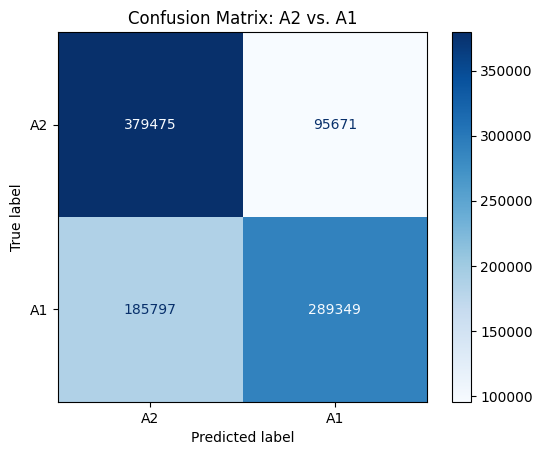

In [32]:
# 1. Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# 2. Create a display object, optionally passing in class names
#    Here we assume label=0 -> A2, label=1 -> A1
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["A2", "A1"])

# 3. Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: A2 vs. A1")
plt.show()

In [33]:
print(y_test.shape)

(950292,)
